<a href="https://colab.research.google.com/github/AlvaroCastro22/SI-TF/blob/main/RegresionLinealDistrito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Cargar datos desde el archivo
file_path = '/home/data_procesada.xlsx'
data = pd.read_excel(file_path)

# Ver las primeras filas de los datos
data.head()


,DISTRITO,PERIODO,UBIGEO,REG_NAT,POB_URBANA,QRESIDUOS_MUN,CLASIFICACION_MUNICIPAL_MEF,DEPARTAMENTO,PROVINCIA,SUMA_TOTAL
0,SAN JUAN DE LURIGANCHO,2022,150132,COSTA,1225092,389666.76,C,LIMA,LIMA,1436328.23
1,SAN JUAN DE LURIGANCHO,2021,150132,COSTA,1203125,382679.69,C,LIMA,LIMA,1819007.92
2,SAN JUAN DE LURIGANCHO,2020,150132,COSTA,1177629,380710.63,C,LIMA,LIMA,2199718.55
3,SAN JUAN DE LURIGANCHO,2019,150132,COSTA,1152258,372508.55,C,LIMA,LIMA,2572227.10
4,SAN JUAN DE LURIGANCHO,2018,150132,COSTA,1136931,351547.07,C,LIMA,LIMA,2923774.17


In [7]:
# Selecciona la variable dependiente
y = data['QRESIDUOS_MUN'].values

# Selecciona las variables independientes
X = data[['PERIODO', 'POB_URBANA']].values


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f"R^2 Score: {score:.4f}")


R^2 Score: 0.7396


In [10]:
#  2 años (24 periodos)
future_periods = np.arange(data['PERIODO'].max() + 1, data['PERIODO'].max() + 3)
future_population = np.linspace(data['POB_URBANA'].iloc[-1], data['POB_URBANA'].iloc[-1] + (data['POB_URBANA'].iloc[-1] - data['POB_URBANA'].iloc[0]) / len(data), num=24)

# Crear un DataFrame para los nuevos periodos
future_df = pd.DataFrame({'PERIODO': np.repeat(future_periods, 12)[:24], 'POB_URBANA': future_population})

# Predicción
X_future = future_df[['PERIODO', 'POB_URBANA']].values
future_predictions = model.predict(X_future)

# Añadir predicciones al DataFrame
future_df['QRESIDUOS_MUN'] = future_predictions

print(future_df)


    PERIODO     POB_URBANA  QRESIDUOS_MUN
0      2023  365921.000000  154901.804217
1      2023  365505.941546  154808.418741
2      2023  365090.883092  154715.033266
3      2023  364675.824638  154621.647790
4      2023  364260.766184  154528.262314
5      2023  363845.707729  154434.876839
6      2023  363430.649275  154341.491363
7      2023  363015.590821  154248.105887
8      2023  362600.532367  154154.720412
9      2023  362185.473913  154061.334936
10     2023  361770.415459  153967.949461
11     2023  361355.357005  153874.563985
12     2024  360940.298551  160052.877161
13     2024  360525.240097  159959.491685
14     2024  360110.181643  159866.106209
15     2024  359695.123188  159772.720734
16     2024  359280.064734  159679.335258
17     2024  358865.006280  159585.949782
18     2024  358449.947826  159492.564307
19     2024  358034.889372  159399.178831
20     2024  357619.830918  159305.793355
21     2024  357204.772464  159212.407880
22     2024  356789.714010  159119

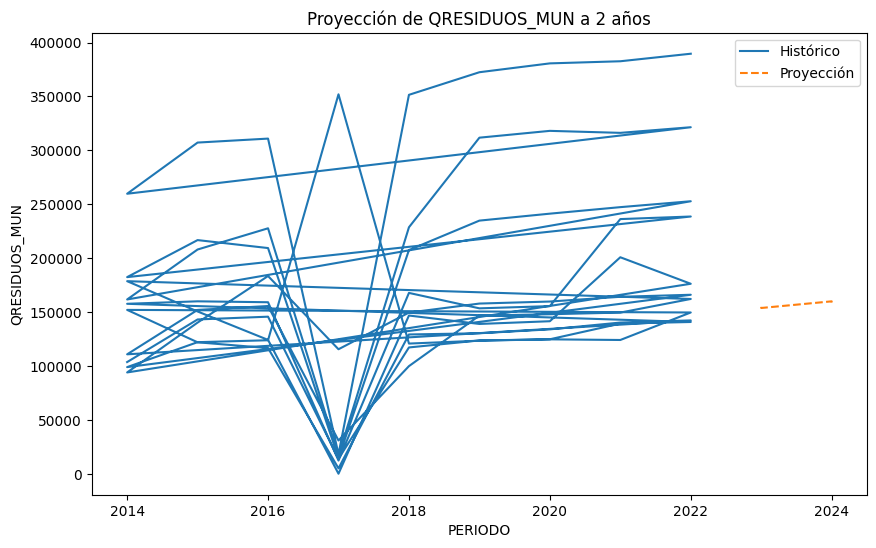

In [11]:
# Graficar los datos históricos y las proyecciones
plt.figure(figsize=(10, 6))
plt.plot(data['PERIODO'], data['QRESIDUOS_MUN'], label='Histórico')
plt.plot(future_df['PERIODO'], future_df['QRESIDUOS_MUN'], label='Proyección', linestyle='--')
plt.xlabel('PERIODO')
plt.ylabel('QRESIDUOS_MUN')
plt.title('Proyección de QRESIDUOS_MUN a 2 años')
plt.legend()
plt.show()


Modelo para SAN JUAN DE LURIGANCHO: R^2 = 0.5319


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


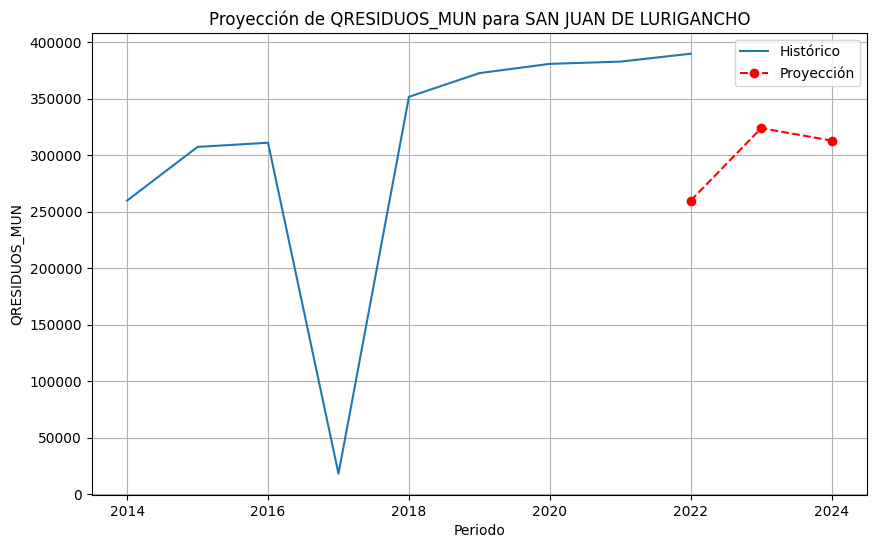

Modelo para SAN MARTIN DE PORRES: R^2 = 0.6363


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


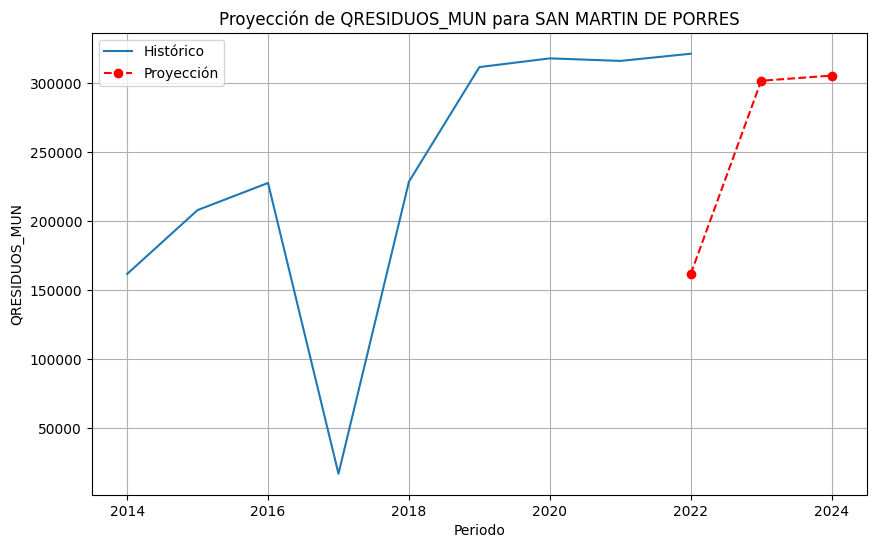

Modelo para ATE: R^2 = 0.3772


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


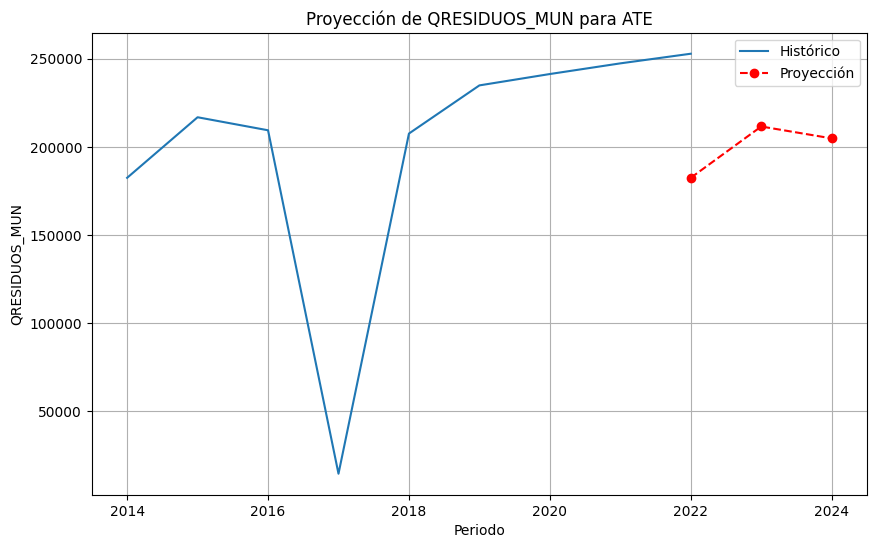

Modelo para COMAS: R^2 = 0.3765


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


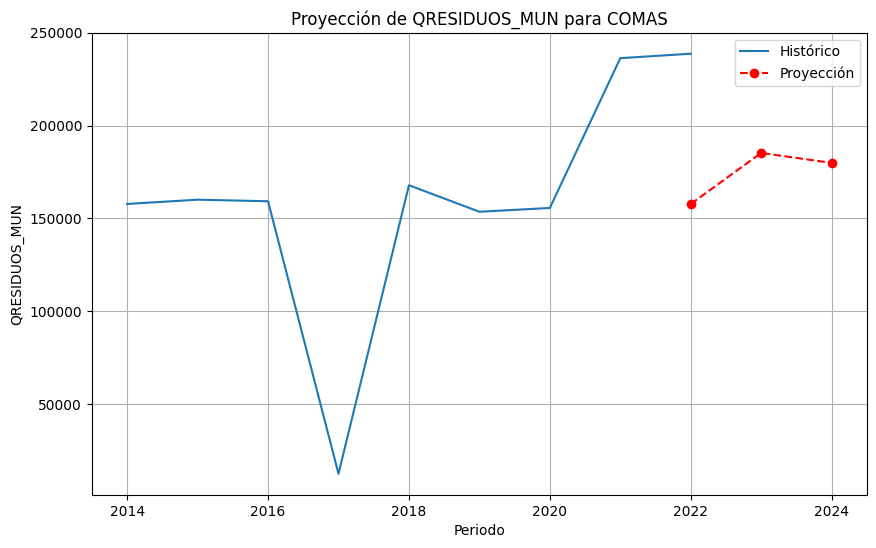

Modelo para SAN JUAN DE MIRAFLORES: R^2 = 0.4899


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


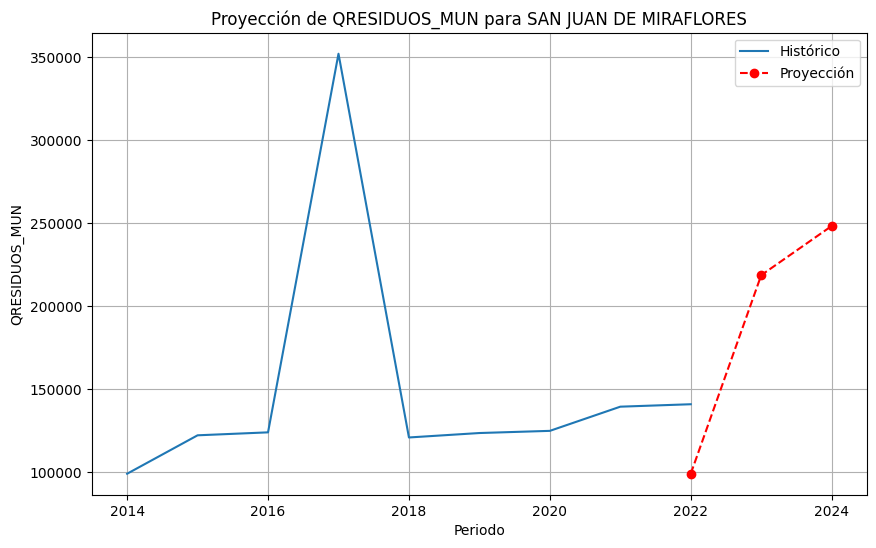

Modelo para VILLA MARIA DEL TRIUNFO: R^2 = 0.3447


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


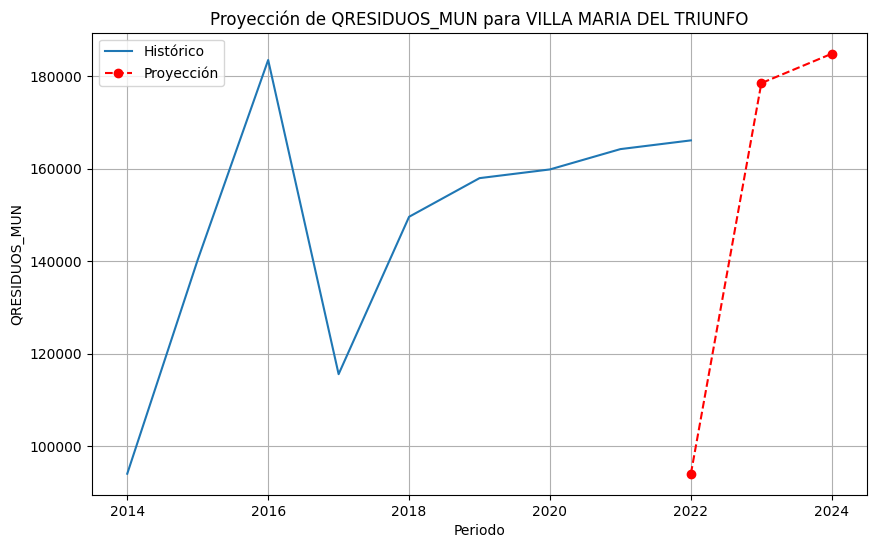

Modelo para CALLAO: R^2 = 0.5015


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


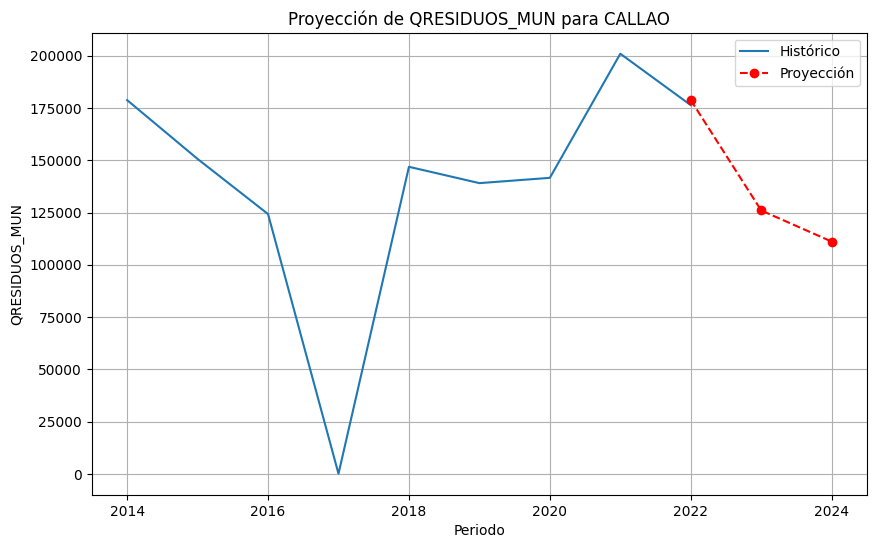

Modelo para VILLA EL SALVADOR: R^2 = 0.1779


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


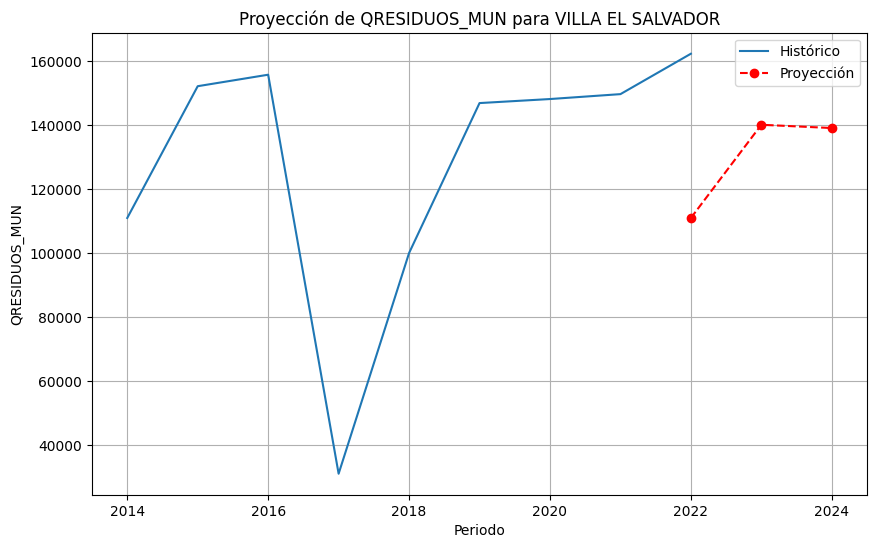

Modelo para SANTIAGO DE SURCO: R^2 = 0.4418


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


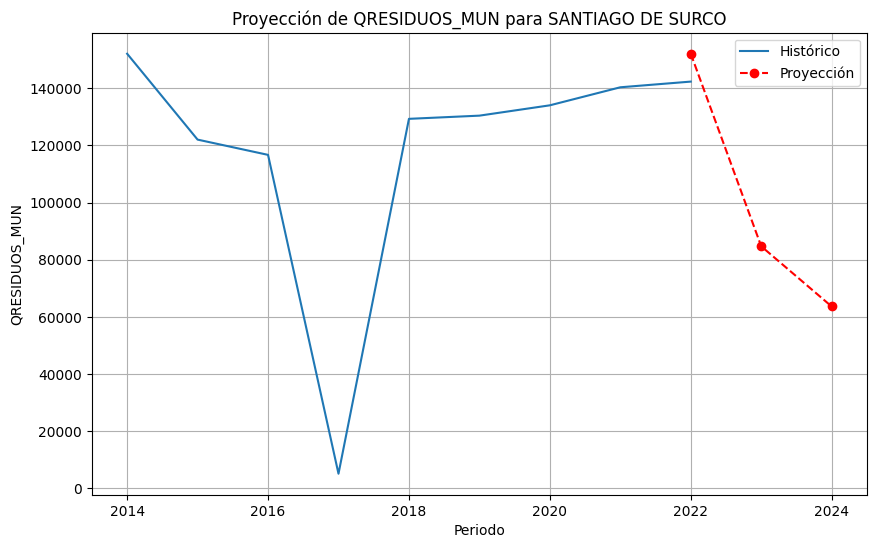

Modelo para LOS OLIVOS: R^2 = 0.2082


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


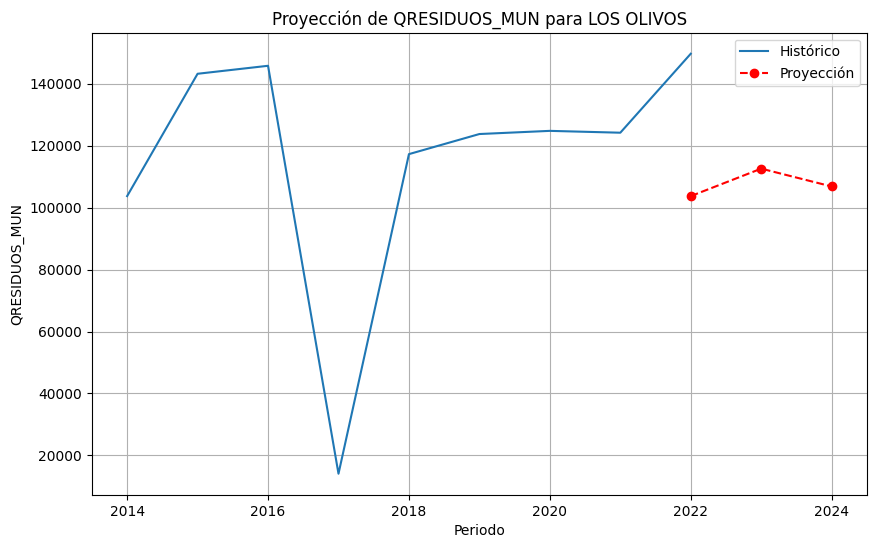

                   DISTRITO  PERIODO  QRESIDUOS_MUN  POB_URBANA
0    SAN JUAN DE LURIGANCHO     2023  323866.060238   1247059.0
1    SAN JUAN DE LURIGANCHO     2024  312843.624338   1269026.0
2      SAN MARTIN DE PORRES     2023  301885.904926    783234.0
3      SAN MARTIN DE PORRES     2024  305656.342580    795743.0
4                       ATE     2023  211599.386125    718015.0
5                       ATE     2024  204862.981837    733215.0
6                     COMAS     2023  185242.645248    592792.0
7                     COMAS     2024  179886.113856    598670.0
8    SAN JUAN DE MIRAFLORES     2023  218634.222263    426594.0
9    SAN JUAN DE MIRAFLORES     2024  248264.385807    430991.0
10  VILLA MARIA DEL TRIUNFO     2023  178517.086103    453863.0
11  VILLA MARIA DEL TRIUNFO     2024  184873.924879    458951.0
12                   CALLAO     2023  126012.198325    536101.0
13                   CALLAO     2024  111136.421786    543797.0
14        VILLA EL SALVADOR     2023  14

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 2. Cargar los datos desde el archivo Excel
file_path = '/home/data_procesada.xlsx'  # Cambia esta ruta por la ruta correcta en tu Google Colab
data = pd.read_excel(file_path)

# 3. Preparar los datos
data['PERIODO'] = data['PERIODO'].astype(int)
data['POB_URBANA'] = data['POB_URBANA'].astype(float)
data['QRESIDUOS_MUN'] = data['QRESIDUOS_MUN'].astype(float)

# Crear un DataFrame para almacenar las proyecciones
proyecciones = []

# 4. Entrenar modelos de regresión lineal para cada distrito
distritos = data['DISTRITO'].unique()

for distrito in distritos:
    df_distrito = data[data['DISTRITO'] == distrito]

    X = df_distrito[['PERIODO', 'POB_URBANA']]
    y = df_distrito['QRESIDUOS_MUN']

    model = LinearRegression()
    model.fit(X, y)

    # Evaluar el modelo
    score = model.score(X, y)
    print(f"Modelo para {distrito}: R^2 = {score:.4f}")

    # Proyectar a dos años en el futuro
    ultimo_periodo = df_distrito['PERIODO'].max()
    proximo_periodo_1 = ultimo_periodo + 1
    proximo_periodo_2 = ultimo_periodo + 2

    # Suponer que la población urbana sigue la misma tendencia de crecimiento
    ultima_poblacion = df_distrito[df_distrito['PERIODO'] == ultimo_periodo]['POB_URBANA'].values[0]
    crecimiento_poblacion = (ultima_poblacion - df_distrito[df_distrito['PERIODO'] == (ultimo_periodo - 1)]['POB_URBANA'].values[0])
    poblacion_futura_1 = ultima_poblacion + crecimiento_poblacion
    poblacion_futura_2 = ultima_poblacion + 2 * crecimiento_poblacion

    # Hacer predicciones
    prediccion_1 = model.predict([[proximo_periodo_1, poblacion_futura_1]])[0]
    prediccion_2 = model.predict([[proximo_periodo_2, poblacion_futura_2]])[0]

    proyecciones.append({
        'DISTRITO': distrito,
        'PERIODO': proximo_periodo_1,
        'QRESIDUOS_MUN': prediccion_1,
        'POB_URBANA': poblacion_futura_1
    })

    proyecciones.append({
        'DISTRITO': distrito,
        'PERIODO': proximo_periodo_2,
        'QRESIDUOS_MUN': prediccion_2,
        'POB_URBANA': poblacion_futura_2
    })

    plt.figure(figsize=(10, 6))
    plt.plot(df_distrito['PERIODO'], df_distrito['QRESIDUOS_MUN'], label='Histórico')
    plt.plot([ultimo_periodo, proximo_periodo_1, proximo_periodo_2],
              [df_distrito['QRESIDUOS_MUN'].values[-1], prediccion_1, prediccion_2],
              linestyle='--', marker='o', color='red', label='Proyección')
    plt.xlabel('Periodo')
    plt.ylabel('QRESIDUOS_MUN')
    plt.title(f'Proyección de QRESIDUOS_MUN para {distrito}')
    plt.legend()
    plt.grid(True)
    plt.show()

proyecciones_df = pd.DataFrame(proyecciones)

# 5. Visualizar las proyecciones
print(proyecciones_df)

# Guardar las proyecciones en un archivo Excel
proyecciones_df.to_excel('/home/proyecciones.xlsx', index=False)
